# Generating Pseudo-Random Numbers
A key step in Monte Carlo simulations is generating pseudo-random numbers for variables other than the primary variable of interest. These pseudo-random numbers are typically created using algorithms or functions built into programming languages ​​or statistical software. The goal is to generate a sequence of numbers that appear random and have specific probability distributions that are relevant to the model being simulated.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

# Load synthetic data from your model artifacts folder (adjust the path as needed)
synth_data_path = Path("../data/synthetic/synthetic_data_20250508_0011.pkl")
data_path = Path("../data/processed/imputed_data.pkl")

# Load the data
synthetic_df = pd.read_pickle(synth_data_path)
df = pd.read_pickle(data_path)

## Continuous Variables

Statistical techniques such as copulas and kernel density estimation are often used to generate continuous variables in Monte Carlo simulations, especially for correlated non-normally distributed data. These variables are known to have skewed distributions and potential correlations between them.

The method used to generate these variables combines Gaussian copulas with kernel density estimation, followed by transformations to provide non-negative integer values. This approach allows for preserving the complex structure of dependencies between variables while preserving the individual distribution characteristics of each variable.

The process begins with the use of Gaussian copulas. Copulas are functions that describe the dependencies between variables and allow the creation of distributions that model correlated multivariate data. Specifically, the Gaussian copula is derived from the multivariate normal distribution and is parameterized by a correlation matrix. This correlation matrix captures the dependencies between variables in the original dataset.
The first step is to fit Gaussian copulas to the original data. This is done using the GaussianMultivariate class from the copulas library, which estimates the parameters of the copula from the observed data. A copula in this context is a mathematical function that describes the dependencies between variables, regardless of their marginal distributions. Once fitted, copulas can generate new values ​​that preserve the dependency structure of the original variables, allowing for the creation of realistic synthetic data that reflect the characteristics of the original data set.

Values ​​generated directly from Gaussian copulas would have uniform marginal distributions in the interval [0,1]. To better fit the original, potentially skewed distributions of our variables, I take an additional step by using kernel density estimation (KDE). KDE is a nonparametric way of estimating the probability density function of a random variable based on a finite sample of the data.

For each variable, a kernel density estimation is fitted to the original data. This estimator essentially creates a smooth, continuous estimate of the distribution of the variable without taking any particular parametric form. KDE is then used to resample new values, effectively transforming the uniform margins of the copula into distributions that more closely resemble the distributions of the original variables.

After generating samples using copulas and KDE, I apply further transformations to ensure that the values ​​generated are non-negative and integer. This is achieved by using the max function to set the lower bound to zero and the rounding function to convert the values ​​to integers. These transformations are necessary because some of our variables, such as pvlquant (quantification of plasma viral load) and gvlquant (quantification of genital viral load), represent counts or measurements that cannot be negative or fractional.

This method of generating synthetic data is particularly suitable for medical research simulations, where preserving complex relationships between variables is critical to the reliability of subsequent analyses. Using copulas and the KDE environment, you can create synthetic datasets that closely mimic the statistical properties of the original data, including the correlations and distributions of individual variables, without directly replicating any individual patient data.

In [25]:
# List of continuous variables to include in the table
continuous_vars = [
    'age', 'age_sexparts_interaction', 'cd4', 'composite_risk_score', 
    'gravid', 'gvlquant', 'hbg', 'hiv_diagnosis', 'in_the_trial', 
    'lagged_cd4', 'lagged_gvlquant', 'lagged_hbg', 'lagged_pvlquant', 
    'previous_bv_count', 'previous_ct_count', 'previous_gc_count',
    'previous_trich_count', 'previous_uti_count', 'pvlquant', 'sexfreq',
    'sexparts', 'since_last_treatment_bv', 'since_last_treatment_ct',
    'since_last_treatment_gc', 'since_last_treatment_trich'
]

# Select only the continuous variables
cont_df = synthetic_df[continuous_vars]

# Create descriptive statistics table
summary_df = cont_df.describe().T

# Rename columns to requested names
summary_df = summary_df.rename(columns={
    'count': 'observations',
    'mean': 'means',
    'std': 'std dev',
    'min': 'min',
    '25%': '25%',
    '50%': '50%',
    '75%': '75%'
})

# Format numbers: count as int with space separator, floats with comma decimal
summary_df['observations'] = summary_df['observations'].astype(int).apply(lambda x: f'{x:,}'.replace(',', ' '))

for col in ['means', 'std dev', 'min', '25%', '50%', '75%']:
    summary_df[col] = summary_df[col].apply(lambda x: f'{x:,.3f}'.replace(',', 'X').replace('.', ',').replace('X', ' '))

summary_df.reset_index(inplace=True)
summary_df.rename(columns={'index': ''}, inplace=True)

# Display the table
summary_df


,,observations,means,std dev,min,25%,50%,75%,max
0,age,20 000,"31,652","4,837","18,000","28,000","32,000","35,000",43.000000
1,age_sexparts_interaction,20 000,"32,455","11,757","0,000","28,000","32,000","37,000",82.000000
2,cd4,20 000,"640,627","133,831","0,000","597,000","638,000","677,000",1595.000000
3,composite_risk_score,20 000,"0,397","0,169","0,000","0,273","0,405","0,520",0.896856
4,gravid,20 000,"2,171","1,134","0,000","1,000","2,000","3,000",7.000000
5,gvlquant,20 000,"5 507,700","20 168,389","0,000","0,000","846,000","5 112,000",458803.000000
6,hbg,20 000,"12,233","1,252","0,000","12,000","12,000","13,000",19.000000
7,hiv_diagnosis,20 000,"2 295,259","1 559,264","0,000","1 012,000","2 122,000","3 362,000",7625.000000
8,in_the_trial,20 000,"683,442","246,589","0,000","512,000","675,000","830,000",1593.000000
9,lagged_cd4,20 000,"150,255","274,025","0,000","0,000","21,000","107,000",1689.000000


For comparison, I will also show the distribution of these variables on graphs, comparing them with the original values:

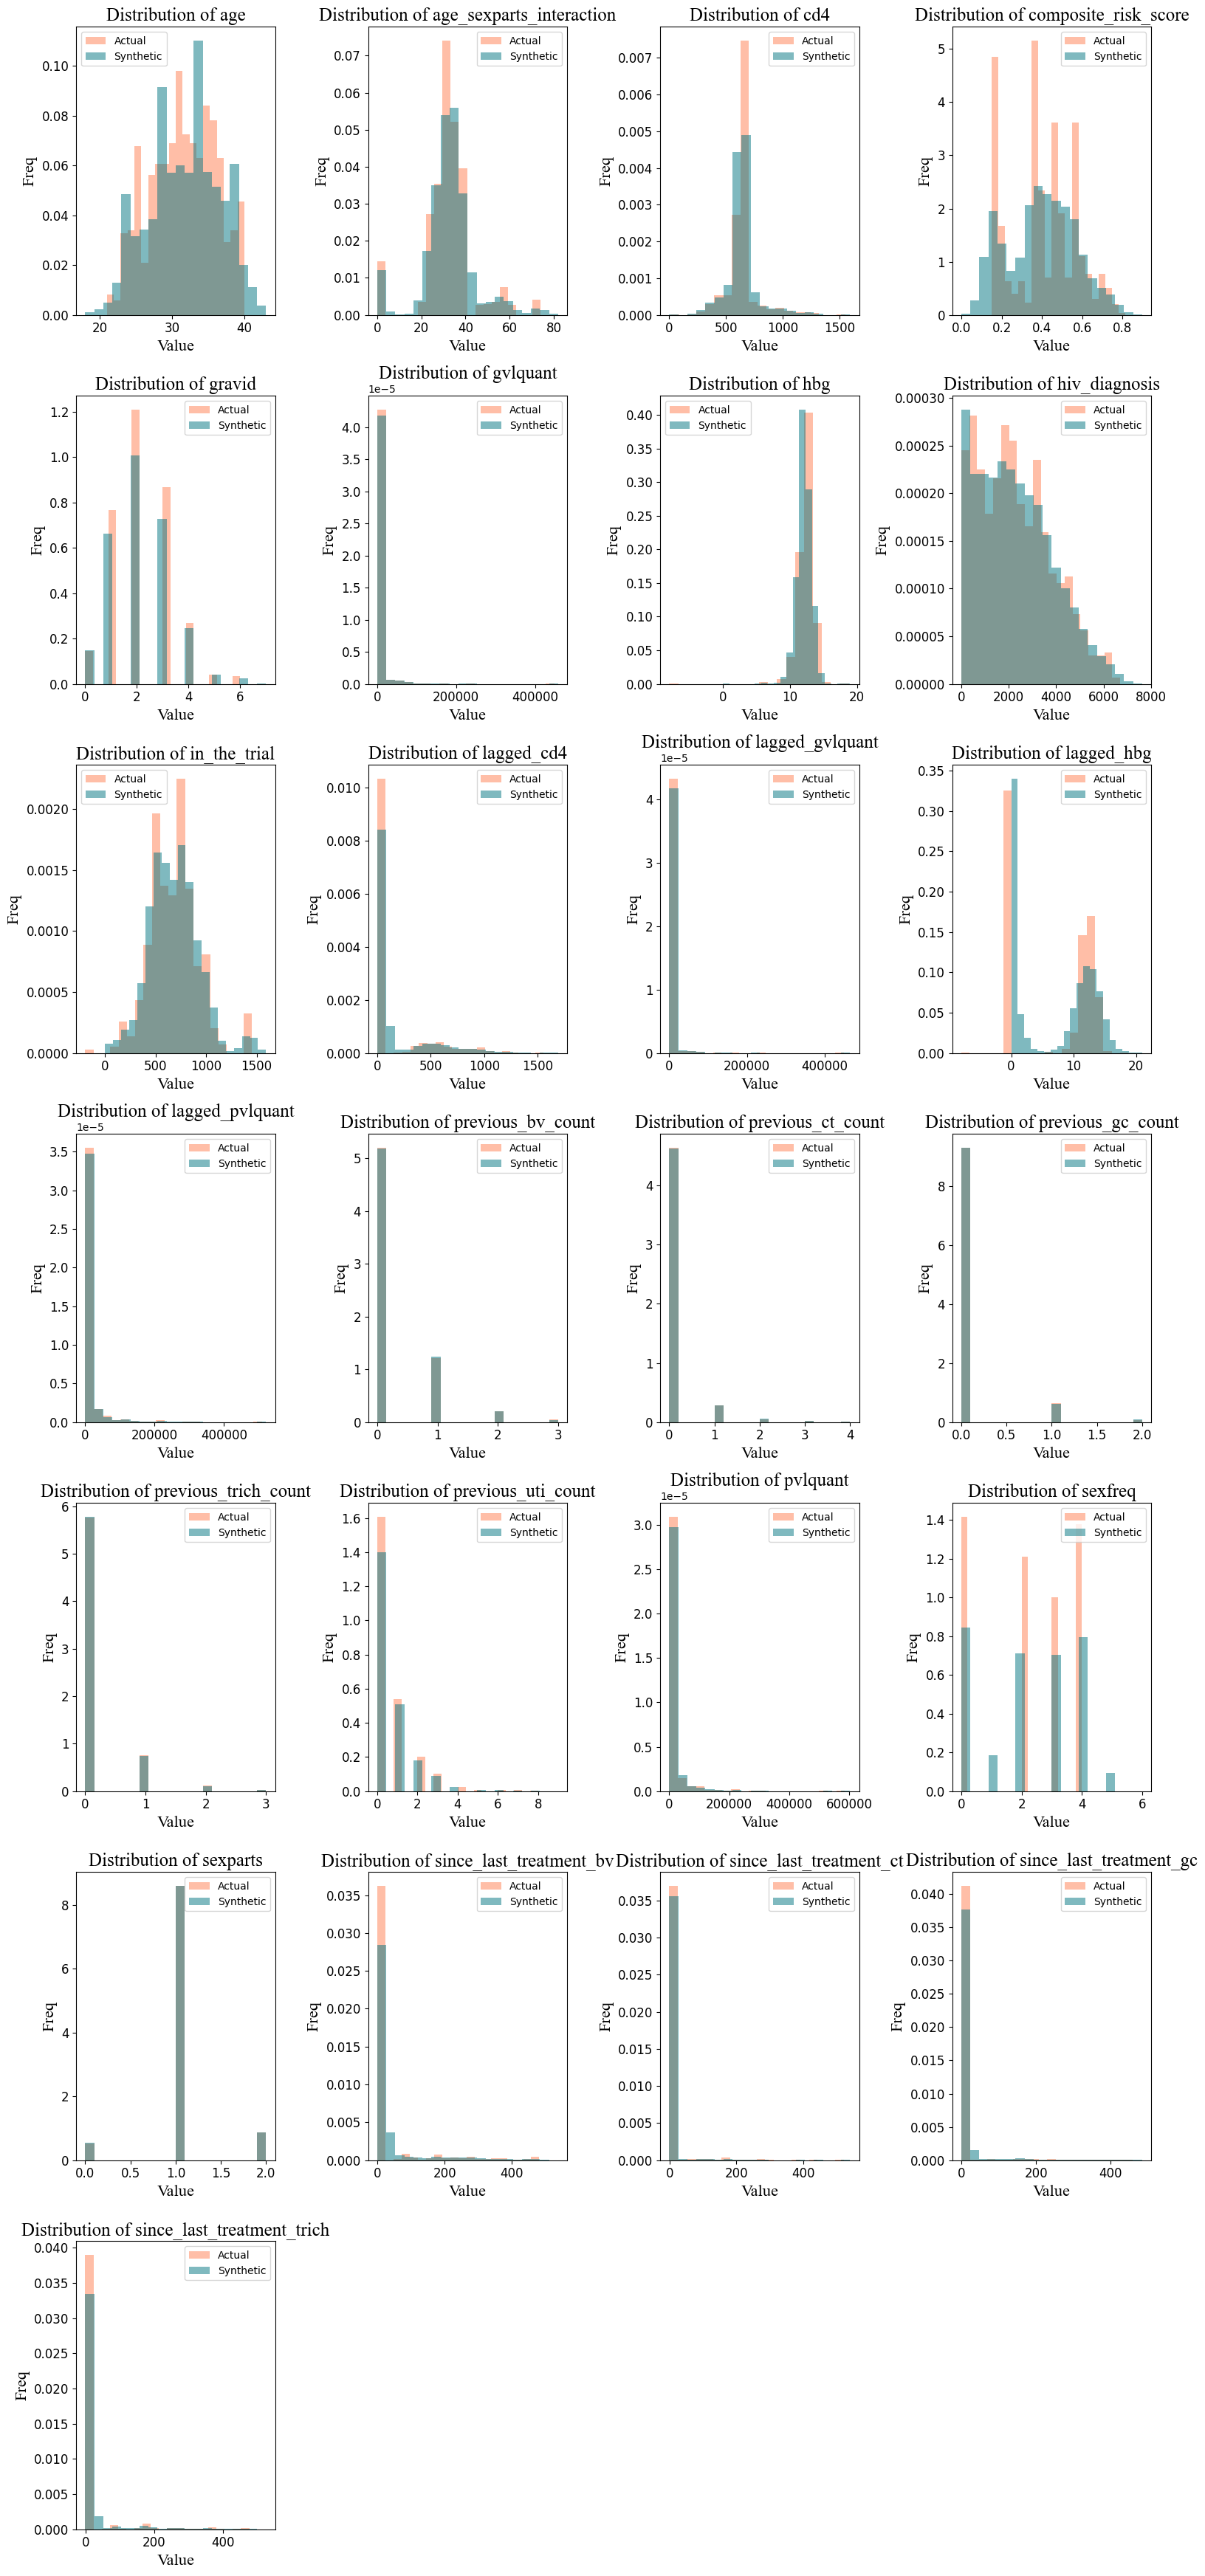

In [26]:
num_vars = len(continuous_vars)
num_cols = 4
num_rows = (num_vars + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 5 * num_rows))
plt.rcParams['font.family'] = 'Times New Roman'
plt.style.use('default')

for i, column in enumerate(continuous_vars):
    row = i // num_cols
    col = i % num_cols
    
    # Plot original data
    sns.histplot(df[column], ax=axes[row, col], color='#FF7F50', kde=False, bins=20, alpha=0.5, label='Actual', stat='density', linewidth=0)
    
    # Plot synthetic data
    sns.histplot(synthetic_df[column], ax=axes[row, col], color='#007481', kde=False, bins=20, alpha=0.5, label='Synthetic', stat='density', linewidth=0)
    
    # Set title and labels
    axes[row, col].set_title(f'Distribution of {column}', fontsize=18, fontname='Times New Roman')
    axes[row, col].set_xlabel('Value', fontsize=16, fontname='Times New Roman')
    axes[row, col].set_ylabel('Freq', fontsize=16, fontname='Times New Roman')
    axes[row, col].tick_params(axis='both', labelsize=12)
    axes[row, col].legend()

# Remove empty subplots
for i in range(num_vars, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

The generated data retains the basic distributional properties of the original dataset, making it a reliable representation for further analysis and simulation.

## Binary Variables

During a Monte Carlo simulation, most binary variables will be generated according to their distribution in the original dataset. This means that the probability of each binary variable taking on the value 0 or 1 will reflect the proportions observed in the historical data. For example, if 30% of the original dataset had a PID value of 1 (indicating the presence of pelvic inflammatory disease), the simulation will generate that variable with a 30% probability of 1 and a 70% probability of 0. This ensures that the simulated data retain the same statistical properties as the observed data.

The exceptions are the binary variables gvl, pvl, and their lagged counterparts, which are always 0 when their counterparts gvlquant and pvlquant (previously generated together with the continuous variables) are zero. These two variables are added separately based on this rule.
For each lagged binary variable, the process is slightly different, due to the correlation between the lagged variables and their non-lagged counterparts. The correlation between the lagged and non-lagged variables is calculated from the original dataset. A correlated random variable is then generated using a linear combination of the non-lagged variable and a normal random variable. This method, known as the Cholesky decomposition method, ensures that the generated lagged variable maintains the desired correlation with its non-lagged counterpart (Escobar, 2021). The resulting continuous variable is then converted to binary format to fit the original data structure.
Below is an example of the generated table containing the binary variables selected in the model:

In [27]:
# List of continuous variables to include in the table
binary_vars = ['artgroup', 'lagged_PID', 'PID', 'arm', 
               'education', 'employed', 'iud_reason_Bleeding', 
               'iud_reason_Wants pregnancy', 'iud_reason_Pain', 'iud_reason_PID', 
               'iud_reason_Pregnancy with IUD', 'iud_reason_Ectopic preg', 
               'iud_reason_Risk of infection', 'iud_reason_Colposcopy', 
               'iud_reason_Relocating', 'art', 'everpreg', 'lagged_art']

# Select only the continuous variables
bin_df = synthetic_df[binary_vars]

# Create descriptive statistics table
summary_df = bin_df.describe().T

# Rename columns to requested names
summary_df = summary_df.rename(columns={
    'count': 'observations',
    'mean': 'means',
    'std': 'std dev',
    'min': 'min',
    '25%': '25%',
    '50%': '50%',
    '75%': '75%'
})

# Format numbers: count as int with space separator, floats with comma decimal
summary_df['observations'] = summary_df['observations'].astype(int).apply(lambda x: f'{x:,}'.replace(',', ' '))

for col in ['means', 'std dev', 'min', '25%', '50%', '75%']:
    summary_df[col] = summary_df[col].apply(lambda x: f'{x:,.3f}'.replace(',', 'X').replace('.', ',').replace('X', ' '))

summary_df.reset_index(inplace=True)
summary_df.rename(columns={'index': ''}, inplace=True)

# Display the table
summary_df

,,observations,means,std dev,min,25%,50%,75%,max
0,artgroup,20 000,"0,643","0,479","0,000","0,000","1,000","1,000",1.0
1,lagged_PID,20 000,"0,002","0,047","0,000","0,000","0,000","0,000",1.0
2,PID,20 000,"0,003","0,053","0,000","0,000","0,000","0,000",1.0
3,arm,20 000,"0,509","0,500","0,000","0,000","1,000","1,000",1.0
4,education,20 000,"0,233","0,422","0,000","0,000","0,000","0,000",1.0
5,employed,20 000,"0,345","0,476","0,000","0,000","0,000","1,000",1.0
6,iud_reason_Bleeding,20 000,"0,053","0,225","0,000","0,000","0,000","0,000",1.0
7,iud_reason_Wants pregnancy,20 000,"0,029","0,167","0,000","0,000","0,000","0,000",1.0
8,iud_reason_Pain,20 000,"0,078","0,268","0,000","0,000","0,000","0,000",1.0
9,iud_reason_PID,20 000,"0,013","0,113","0,000","0,000","0,000","0,000",1.0


The distribution of binary variables in the original and generated datasets matches almost perfectly:

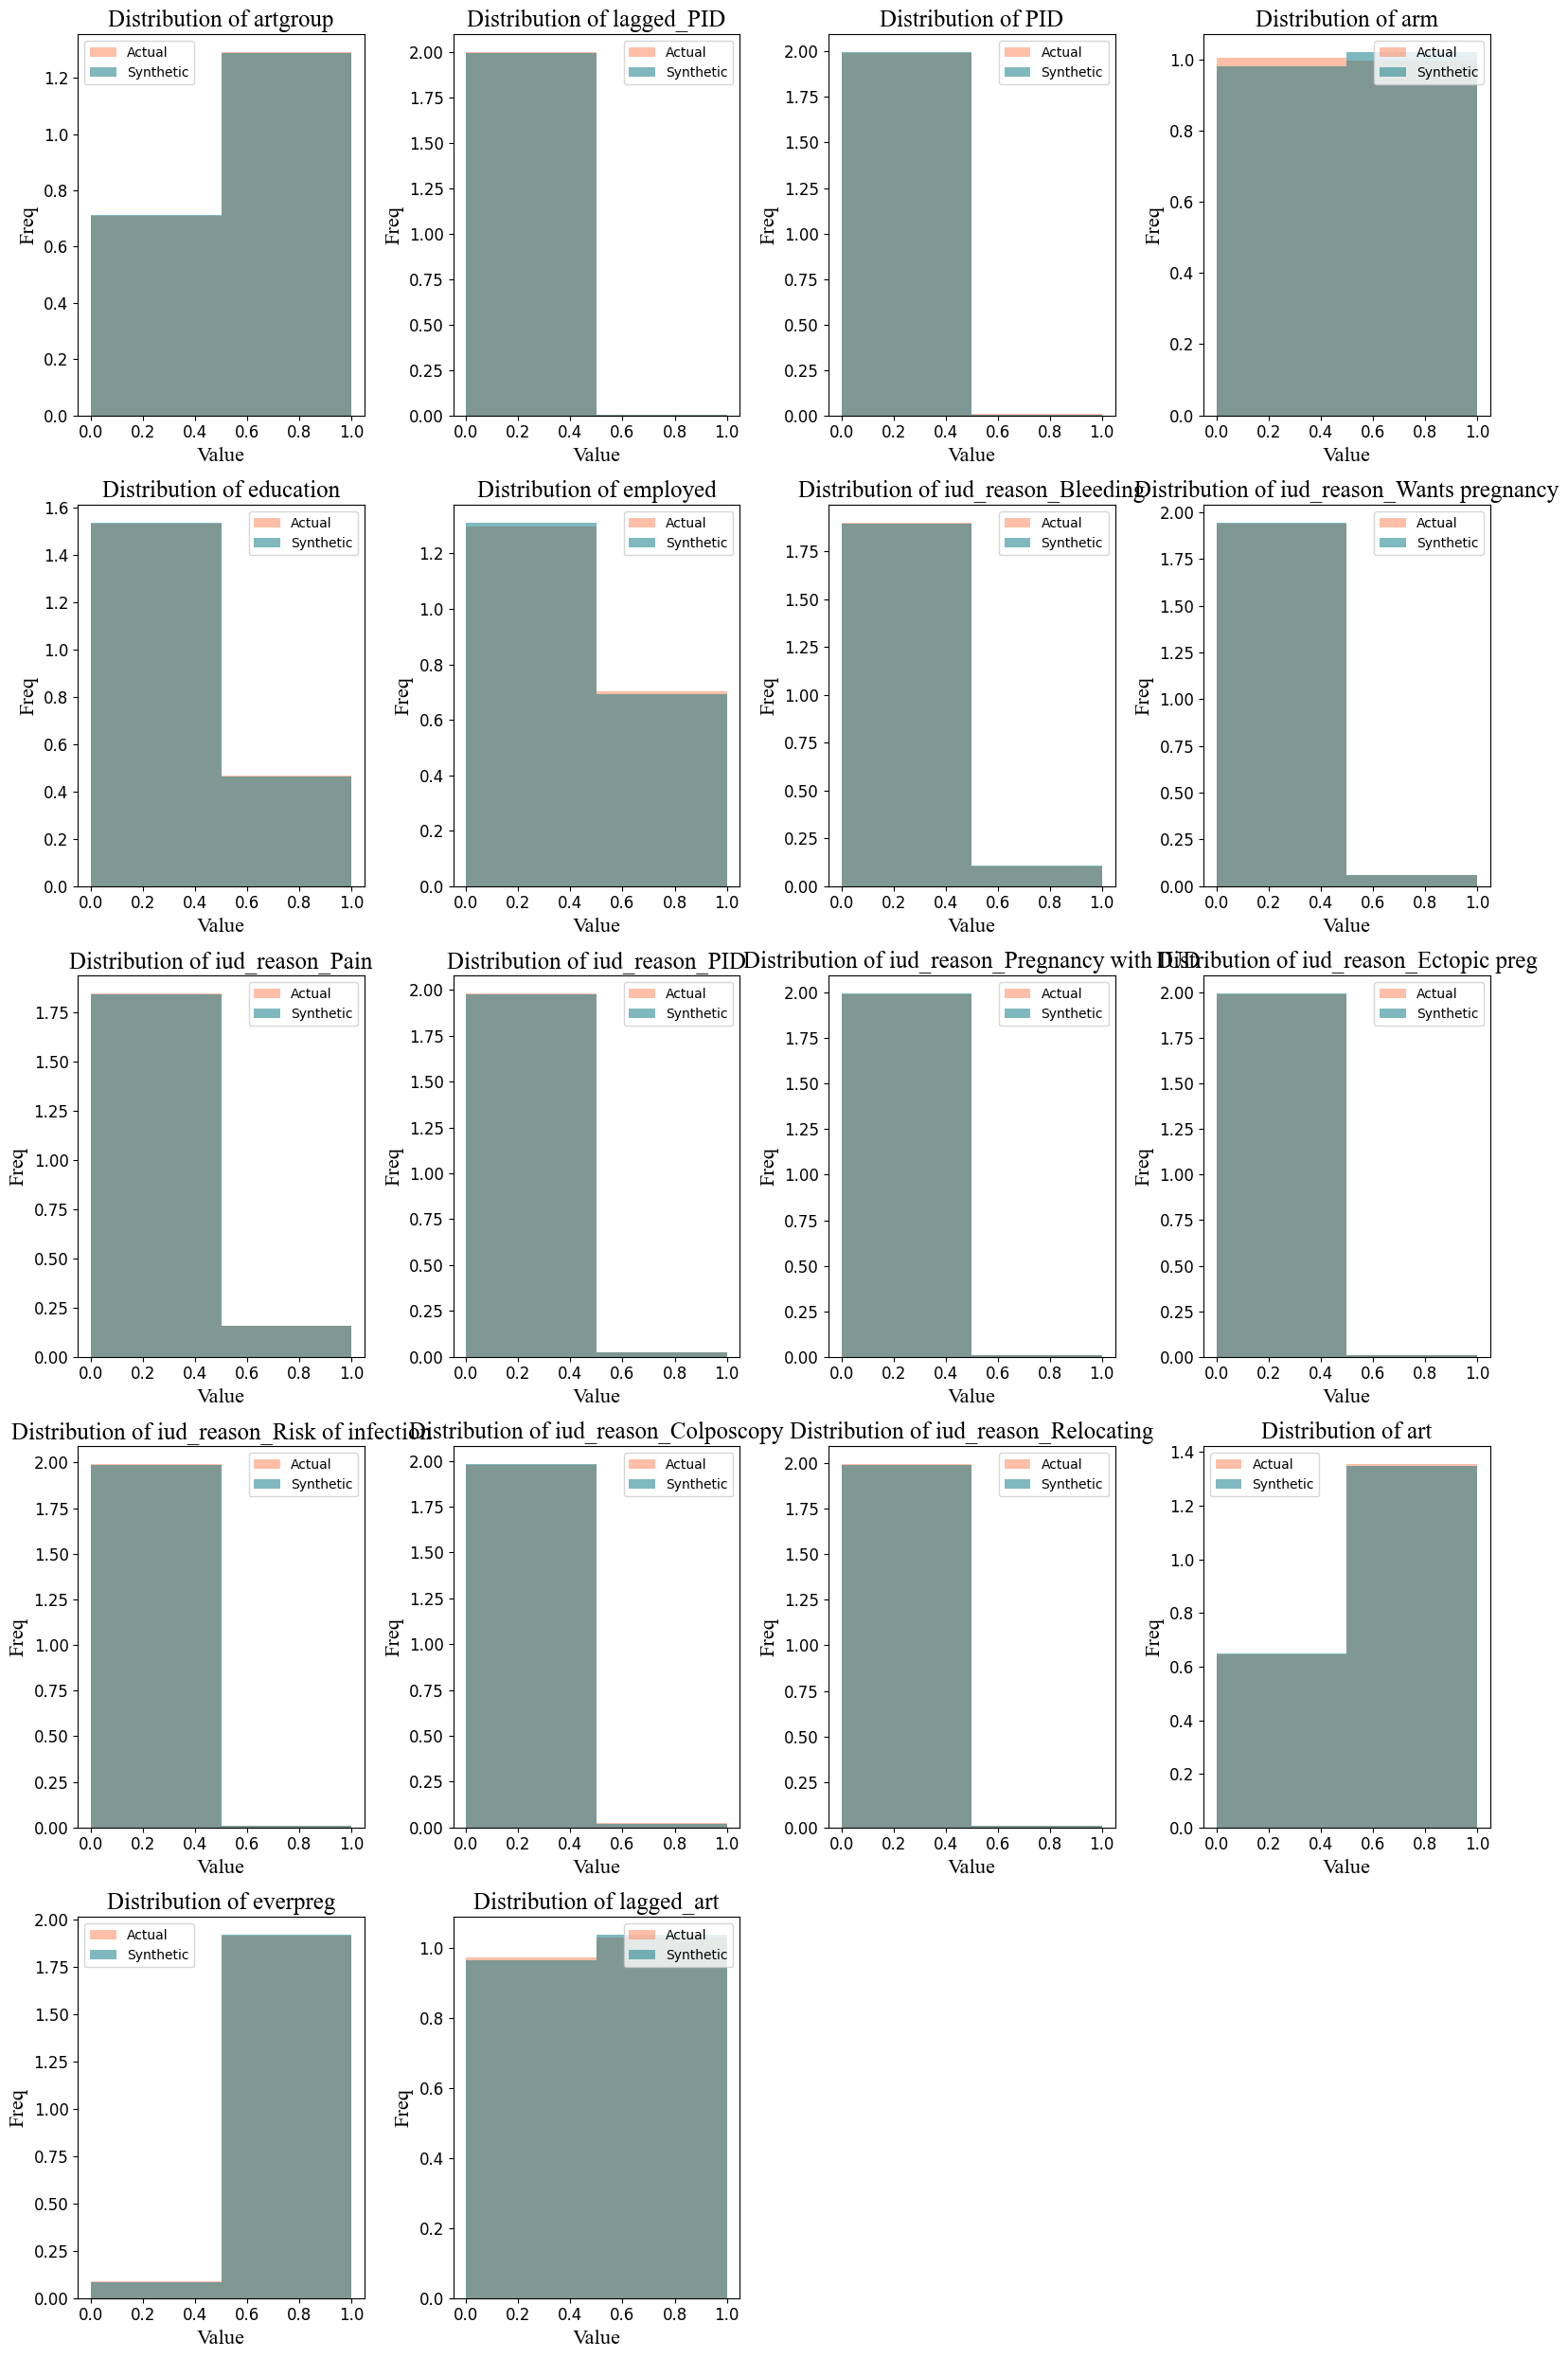

In [28]:
num_vars = len(binary_vars)
num_cols = 4
num_rows = (num_vars + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 5 * num_rows))
plt.rcParams['font.family'] = 'Times New Roman'
plt.style.use('default')

for i, column in enumerate(binary_vars):
    row = i // num_cols
    col = i % num_cols
    
    # Plot original data
    sns.histplot(df[column], ax=axes[row, col], color='#FF7F50', kde=False, bins=2, alpha=0.5, label='Actual', stat='density', linewidth=0)
    
    # Plot synthetic data
    sns.histplot(synthetic_df[column], ax=axes[row, col], color='#007481', kde=False, bins=2, alpha=0.5, label='Synthetic', stat='density', linewidth=0)
    
    # Set title and labels
    axes[row, col].set_title(f'Distribution of {column}', fontsize=18, fontname='Times New Roman')
    axes[row, col].set_xlabel('Value', fontsize=16, fontname='Times New Roman')
    axes[row, col].set_ylabel('Freq', fontsize=16, fontname='Times New Roman')
    axes[row, col].tick_params(axis='both', labelsize=12)
    axes[row, col].legend()

# Remove empty subplots
for i in range(num_vars, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()